# The SIR Model



todo

$\large R_0 = \frac{\beta}{\gamma}$

where S is the stock of susceptible population in unit number of people, 
I is the stock of infected in unit number of people, 
R is the stock of removed population (either by death or recovery) in unit number of people, and 
N is the sum of these three in unit number of people. 
β is the infection rate constant in the unit number of people infected per day per infected person,  
γ is the recovery rate constant in the unit fraction of a person recovered per day per infected person, when time is in unit day.


## Overview

The Susceptible-Infected-Recovered (SIR) model is an age of infection epidemic model that can be applied to 
In this notebook, we simulate the Kermack-McKendrick model of 1927 to model a  population following the work of [Kermack et al.](https://doi.org/10.1098/rspa.1927.0118). All these models share the basic characteristic that there is a threshold between disappearance of disease and an epidemic outbreak and that an epidemic will die out without infecting the entire population.

## equations

ODEs from the 1927 paper

$\large \frac{dS}{dt} = -\beta IS$

$\large \frac{dI}{dt} = \beta IS - \gamma I$

$\large\frac{dR}{dt} = \gamma I$

# what!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

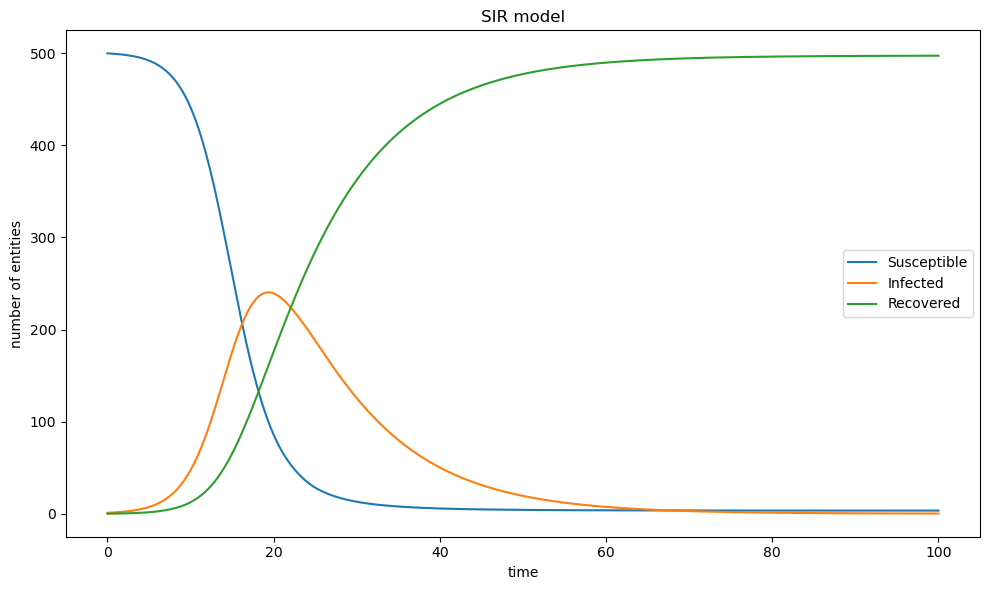

In [27]:
# params
beta = 0.001    # infection rate
gamma = 0.1     # recovery rate

#unused
n = 0           # total population

# initial conditions
S0 = 500
I0 = 1
R0 = 0
initial_conditions = [S0, I0, R0]

t_start = 0
t_end = 100
t_eval = np.linspace(t_start, t_end, 1000)

# odes
def sir_dynamics(t, y):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

odesol = solve_ivp(sir_dynamics, [t_start, t_end], initial_conditions, t_eval=t_eval)

plt.figure(figsize=(10, 6))
plt.plot(odesol.t, odesol.y[0], label='Susceptible')
plt.plot(odesol.t, odesol.y[1], label='Infected')
plt.plot(odesol.t, odesol.y[2], label='Recovered')
plt.xlabel('time')
plt.ylabel('number of entities')
plt.title('SIR model')
plt.legend()
plt.tight_layout()
plt.show()

## R naught

reproductive number and plots that simulate dynamics with different r0 values

## Discussion

Discuss your results in the context of the literature. What are the limitations of the model/analysis? What are the broader implications of your findings? What are some suggested next steps to continue your analysis?

## Project brief

Part 0, Short Project Description: (5% of total class grade)
Provide a one paragraph description of your project topic and computational analysis plan.

Part 1, Writing: (10% of total class grade)
Your write up should be 5 pages or less in total (including figures but excluding references) and include the sections listed below.
- Cover Page (1 page) – Include: title, authors, affiliations, abstract.
- Background (1 page) – Introduce your topic and explain the background of what is
known in the literature to set the stage for your results.
- Results/Methods (1 page individual, 2 pages group) – Describe your results and briefly outline the computational methods to provide context. Include at least one figure (per group member) representing an original computational analysis.
- Discussion (1 page) – Discuss your results in the context of the literature. What are the limitations of the model/analysis? What are the broader implications of your findings? What are some suggested next steps to continue your analysis?
- References – Include at least 3 references from the primary literature. References should be cited throughout the write-up and included in a consistently formatted bibliography appended to the end of the write-up.

Part 2, Coding: (10% of total class grade)
Conduct an original coding analysis related to your topic of choice. Your code can incorporate any of the code from the coding notebooks but should expand the analysis in some way. Your code should generate at least one figure (per group member) that is included in your write up.
Your code should be saved as a jupyter notebook. The code should include a markdown overview at the start introducing the analysis. Each step should be well documented through comments and markdown cells. Your code should be uploaded to a GitHub repository at the time of submission (you will be required to include a link to this repository when submitting the final code).

Part 3, Presentation: (10% of total class grade)
Present your project to the class following the structure of your write up. Presentations should be 5 (individual) or 10 (team) minutes total.

## integral form

$\large S'(t) = -\frac{\beta}{N} S(t) I(t)$

- where $N$ is population size
- time-to-recovery distribution is $F(t)$
- $\beta$ is transmission rate

$\large I(t) = \int_{0}^{t}  (-S’(u))(1-F(t-u) \,du +I(0)(1-F(t))$

$\large R(t) = \int_{0}^{t} (-S’(u)) F(t-u) \,du + R(0) + I(0) F(t)$

## References

Kermack, W., McKendrick, A., & Walker, G. (1927). A contribution to the mathematical theory of epidemics. Proceedings of the Royal Society of London. Series A, Containing Papers of a Mathematical and Physical Character, 115(772), 700-721.
- original paper the odes are from

Alexsandro M. Carvalho, & Sebastián Gonçalves (2021). An analytical solution for the Kermack–McKendrick model. Physica A: Statistical Mechanics and its Applications, 566, 125659.
- this is the one that had the R_0 plots